#                                                     MLP on MNIST Dataset

In [1]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np
import time


Using TensorFlow backend.


# [1] Dataset Loading and pre-processing

In [2]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [4]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape :",X_train.shape)
print("Number of training examples :", X_test.shape[0], "and each image is of shape :",X_test.shape)

Number of training examples : 60000 and each image is of shape : (60000, 28, 28, 1)
Number of training examples : 10000 and each image is of shape : (10000, 28, 28, 1)


In [6]:
# Normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# [2] CNN Models

In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

In [9]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 30

In [10]:
def plt_epoch_vs_loss(x, vy, ty):
    fig = plt.figure(figsize=(9,7))
    sns.set_style("whitegrid",{'axes.grid' : True})
    plt.plot(x, vy, 'b', label="Validation Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("Categorical Crossentropy Loss")
    plt.title("Loss")
    plt.show()


## [2.1] Model 1

 Input(28,28) - CONV - ReLu - CONV - ReLu - Pool - Dropout - CONV - ReLu - Pool - Dropout - Flatten - ReLu - Dropout - Softmax(Output(10)) - Adam Optimizer

In [11]:
# Model 1 parameters :
#       Conv layers : layer1 = 32,layer2 = 64,layer3 = 128
#       kernal : (2,2)
#       Pooling : (2,2)
#       Dropout : 0.5

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
model1.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))
model1.add(Conv2D(128, kernel_size=(2, 2),padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(output_dim, activation='softmax'))

model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)       

In [12]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 159s 3ms/step - loss: 0.3913 - accuracy: 0.8763 - val_loss: 0.0818 - val_accuracy: 0.9743
Epoch 2/30
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1400 - accuracy: 0.9571 - val_loss: 0.0459 - val_accuracy: 0.9854
Epoch 3/30
60000/60000 [==============================] - 154s 3ms/step - loss: 0.1083 - accuracy: 0.9676 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 4/30
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0942 - accuracy: 0.9712 - val_loss: 0.0353 - val_accuracy: 0.9877
Epoch 5/30
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0835 - accuracy: 0.9746 - val_loss: 0.0316 - val_accuracy: 0.9902
Epoch 6/30
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0779 - accuracy: 0.9762 - val_loss: 0.0291 - val_accuracy: 0.9903
Epoch 7/30
60000/60000 [==============================] - 152

Test score: 0.018688983194074717
Test accuracy: 0.9944000244140625


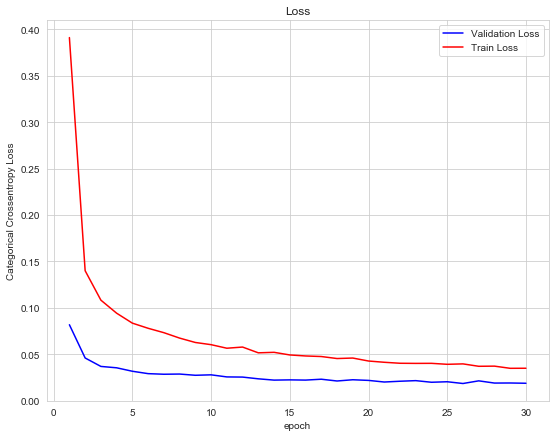

In [14]:
score1 = model1.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score1[0]) 
print('Test accuracy:', score1[1])

# list of epoch numbers
epochs = list(range(1,nb_epoch+1))
val_loss = history.history['val_loss']
train_loss = history.history['loss']
plt_epoch_vs_loss(epochs, val_loss, train_loss)

#  [2.2] Model 2

Input(28,28) - CONV - ReLu - CONV - ReLu - Pool - Dropout - CONV - ReLu - CONV - ReLu - Pool - Dropout - CONV - ReLu - Pool - Dropout - Flatten - ReLu - Dropout - Softmax(Output(10)) - Adam Optimizer

In [15]:
# Model 2 parameters :
#       Conv layers : 5
#       layer1 = 32,layer2 = 64,layer3 = 128,layer4 = 256,layer5 = 512
#       kernal : (3,3)
#       Pooling : (3,3)
#       Dropout : 0.5

from keras.initializers import glorot_normal

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=input_shape))
model2.add(Conv2D(64, kernel_size=(3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.5))
model2.add(Conv2D(128, kernel_size=(3, 3),padding='same',activation='relu'))
model2.add(Conv2D(256, kernel_size=(3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.5))
model2.add(Conv2D(512, kernel_size=(3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(256, activation='relu',kernel_initializer = glorot_normal(seed=None)))
model2.add(Dropout(0.5))
model2.add(Dense(output_dim, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 256)        

In [16]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 516s 9ms/step - loss: 0.5370 - accuracy: 0.8160 - val_loss: 0.0441 - val_accuracy: 0.9861
Epoch 2/30
60000/60000 [==============================] - 513s 9ms/step - loss: 0.0954 - accuracy: 0.9723 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 3/30
60000/60000 [==============================] - 500s 8ms/step - loss: 0.0692 - accuracy: 0.9801 - val_loss: 0.0215 - val_accuracy: 0.9932
Epoch 4/30
60000/60000 [==============================] - 498s 8ms/step - loss: 0.0563 - accuracy: 0.9843 - val_loss: 0.0176 - val_accuracy: 0.9947
Epoch 5/30
60000/60000 [==============================] - 499s 8ms/step - loss: 0.0550 - accuracy: 0.9844 - val_loss: 0.0205 - val_accuracy: 0.9936
Epoch 6/30
60000/60000 [==============================] - 502s 8ms/step - loss: 0.0464 - accuracy: 0.9866 - val_loss: 0.0183 - val_accuracy: 0.9946
Epoch 7/30
60000/60000 [==============================] - 498s

Test score: 0.015234262454181245
Test accuracy: 0.9955000281333923


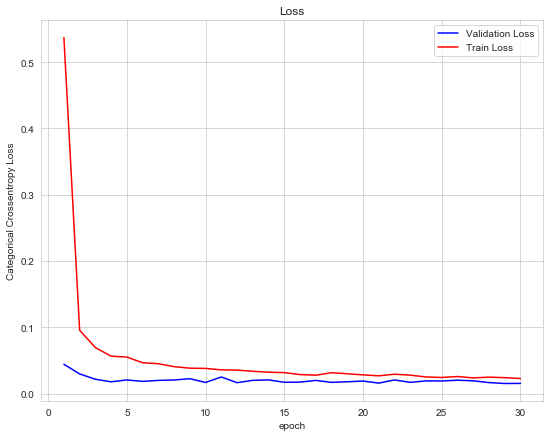

In [17]:
score2 = model2.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score2[0]) 
print('Test accuracy:', score2[1])

# list of epoch numbers
epochs = list(range(1,nb_epoch+1))
val_loss = history.history['val_loss']
train_loss = history.history['loss']
plt_epoch_vs_loss(epochs, val_loss, train_loss)

# [2.3] Model3

Input(28,28) - CONV - ReLu - CONV - ReLu - Pool - Dropout - CONV - ReLu - CONV - ReLu - Pool - Dropout - CONV - ReLu - CONV - ReLu - Pool - Dropout - CONV - ReLu - Pool - Dropout - Flatten - ReLu(BatchNormalization()) - Dropout - Softmax(Output(10)) - Adam Optimizer

In [18]:
# Model 7 parameters :
#       Conv layers : 7
#       layer1 = 100,layer2 = 150,layer3 = 200,layer4 = 250,layer5 = 350,layer = 400,layer = 512
#       kernal : (5,5)
#       Pooling : (5,5)
#       Dropout : 0.25

from keras.initializers import he_normal

model3 = Sequential()
model3.add(Conv2D(100, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))
model3.add(Conv2D(150, kernel_size=(5, 5),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(5, 5),padding = 'same'))
model3.add(Dropout(0.25))
model3.add(Conv2D(200, kernel_size=(5, 5),padding='same',activation='relu'))
model3.add(Conv2D(250, kernel_size=(5, 5),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(5, 5),padding = 'same'))
model3.add(Dropout(0.25))
model3.add(Conv2D(350, kernel_size=(5, 5),padding='same',activation='relu'))
model3.add(Conv2D(400, kernel_size=(5, 5),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(5, 5),padding = 'same'))
model3.add(Dropout(0.25))
model3.add(Conv2D(512, kernel_size=(5, 5),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(5, 5),padding = 'same'))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(256, activation='relu',kernel_initializer = he_normal(seed=None)))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))
model3.add(Dense(output_dim, activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 100)       2600      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 150)       375150    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 150)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 150)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 200)         750200    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 250)         1250250   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 250)        

In [19]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3974s 66ms/step - loss: 0.3190 - accuracy: 0.8878 - val_loss: 0.0387 - val_accuracy: 0.9889
Epoch 2/30
60000/60000 [==============================] - 3763s 63ms/step - loss: 0.0574 - accuracy: 0.9847 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 3/30
60000/60000 [==============================] - 3763s 63ms/step - loss: 0.0429 - accuracy: 0.9887 - val_loss: 0.0325 - val_accuracy: 0.9912
Epoch 4/30
60000/60000 [==============================] - 3730s 62ms/step - loss: 0.0309 - accuracy: 0.9918 - val_loss: 0.0272 - val_accuracy: 0.9927
Epoch 5/30
60000/60000 [==============================] - 3719s 62ms/step - loss: 0.0294 - accuracy: 0.9924 - val_loss: 0.0301 - val_accuracy: 0.9918
Epoch 6/30
60000/60000 [==============================] - 3719s 62ms/step - loss: 0.0257 - accuracy: 0.9934 - val_loss: 0.0352 - val_accuracy: 0.9912
Epoch 7/30
60000/60000 [==========================

Test score: 0.02541344242626779
Test accuracy: 0.9951000213623047


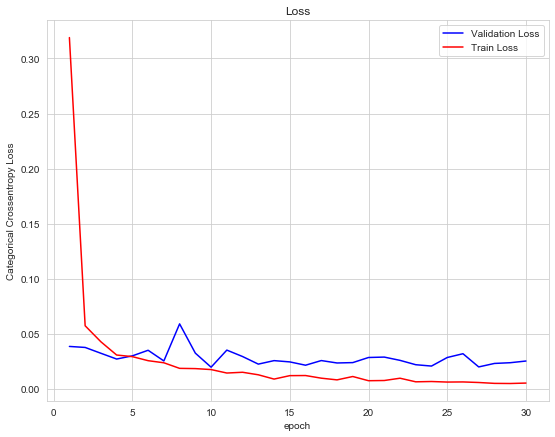

In [20]:
score3 = model3.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score3[0]) 
print('Test accuracy:', score3[1])

# list of epoch numbers
epoch = list(range(1,nb_epoch+1))
val_loss = history.history['val_loss']
train_loss = history.history['loss']
plt_epoch_vs_loss(epoch, val_loss, train_loss)

# [3] Results

In [22]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model","Conv Layers","Score","Accuracy"]
table.add_row([1,3 ,round(score1[0],3),round(score1[1],3)])
table.add_row([2,5,round(score2[0],3),round(score2[1],3)])
table.add_row([3,7,round(score3[0],3),round(score3[1],3)])

print(table.get_string(title="Results"))

+----------------------------------------+
|                Results                 |
+-------+-------------+-------+----------+
| Model | Conv Layers | Score | Accuracy |
+-------+-------------+-------+----------+
|   1   |      3      | 0.019 |  0.994   |
|   2   |      5      | 0.015 |  0.996   |
|   3   |      7      | 0.025 |  0.995   |
+-------+-------------+-------+----------+


# [4] Conclusion

There is no much difference in the accuracy of all models.